## 01.- Bandido Bayesiano

#### a) Librerías

In [14]:
from __future__ import print_function, division
from builtins import range

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [16]:
# np.random.seed(2) #Creación de semilla
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [17]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1
    self.N = 0 # for information only

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x
    self.N += 1

In [18]:
def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")
  plt.title(f"Distribución del Bandido despues de {trial} ensayos")
  plt.legend()
  plt.show()

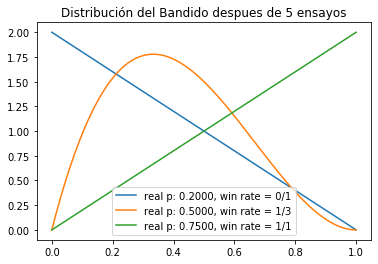

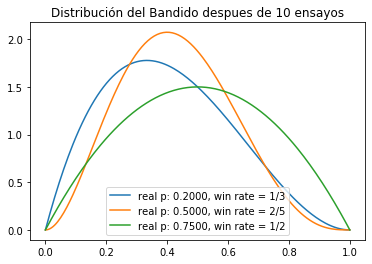

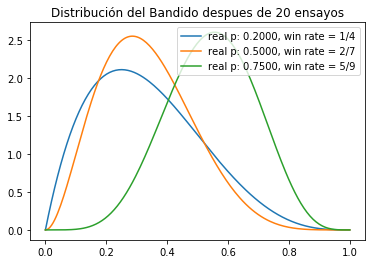

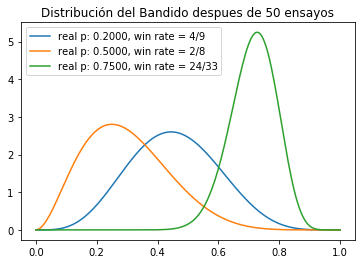

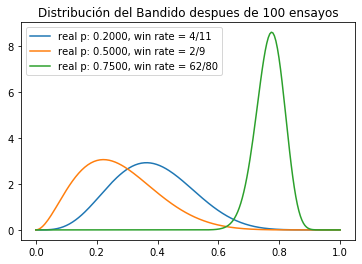

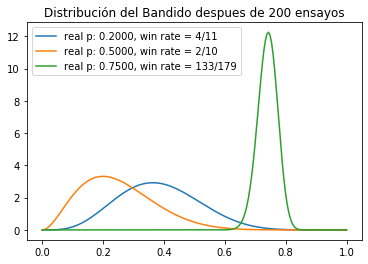

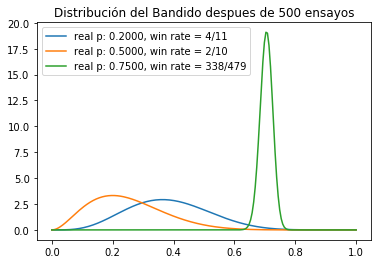

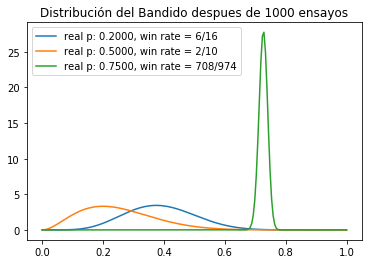

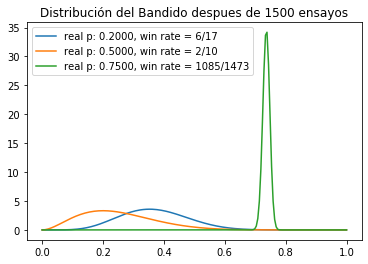

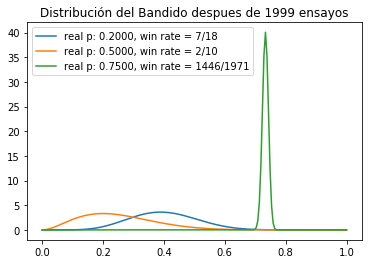

Recompensa Total Ganada: 1455.0
Tasa de Ganancia General: 0.7275
Núnmero de Veces Seleccionado Cada Bandido: [18, 10, 1972]


In [19]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # Thompson sampling
    j = np.argmax([b.sample() for b in bandits])

    # plot the posteriors
    if i in sample_points:
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

  # print total reward
  print("Recompensa Total Ganada:", rewards.sum())
  print("Tasa de Ganancia General:", rewards.sum() / NUM_TRIALS)
  print("Núnmero de Veces Seleccionado Cada Bandido:", [b.N for b in bandits])


if __name__ == "__main__":
  experiment()
